## Análisis de la colección TCE60

Este ejemplo muestra cómo analizar el dataset generado a partir de los documentos TEI originales en XML. Se ha creado un fichero en formato CSV que es posible analizar con la librería Pandas de Python. 

El corpus original se puede consultar en la Biblioteca Virtual Miguel de Cervantes:
https://www.cervantesvirtual.com/portales/teatro_clasico_espanol/obra/canon-60-la-coleccion-esencial-del-tc12-teatro-clasico-espanol/

La colección se basa en los parlamentos de las obras incluidas en el corpus TCE60 organizados a modo de registro (idRegistro, idAutoridad, Personaje, Texto) 

### Importamos las librerías de Python

In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [140]:
idObra = '707442' +  '.xml'
df = pd.read_csv ('../data/procesado-sentimientos.csv', sep=';')
df = df[df['Registro'] == idObra]
df['sentimiento'] = df['sentimiento'].astype('category')

Unnamed: 0         755
Registro           755
ID Autoridad       755
Índice             755
Personaje          754
Contenido XML      755
Contenido texto    755
sentimiento        755
dtype: int64
Unnamed: 0         75
Registro           75
ID Autoridad       75
Índice             75
Personaje          75
Contenido XML      75
Contenido texto    75
sentimiento        75
dtype: int64
75


(array([0.09333333, 0.02666667, 0.04      , 0.08      , 0.08      ,
        0.12      , 0.08      , 0.18666667, 0.09333333, 0.2       ]),
 array([  8.,  81., 154., 227., 300., 373., 446., 519., 592., 665., 738.]),
 <BarContainer object of 10 artists>)

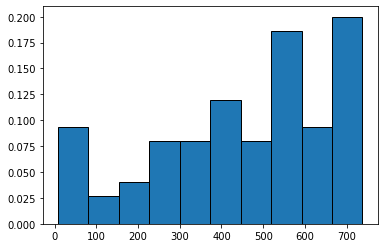

In [141]:
POSdata = df.loc[df['sentimiento'] == 'POS']

print(df.count())
print(POSdata.count())
print(POSdata['Índice'].count())

#create relative frequency histogram
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(POSdata['Índice'], edgecolor='black', weights=np.ones_like(POSdata['Índice']) / POSdata['Índice'].count())

Unnamed: 0         755
Registro           755
ID Autoridad       755
Índice             755
Personaje          754
Contenido XML      755
Contenido texto    755
sentimiento        755
dtype: int64
Unnamed: 0         189
Registro           189
ID Autoridad       189
Índice             189
Personaje          188
Contenido XML      189
Contenido texto    189
sentimiento        189
dtype: int64
189


(array([0.08465608, 0.0952381 , 0.10582011, 0.08465608, 0.0952381 ,
        0.08465608, 0.11640212, 0.1005291 , 0.11111111, 0.12169312]),
 array([  3. ,  77.7, 152.4, 227.1, 301.8, 376.5, 451.2, 525.9, 600.6,
        675.3, 750. ]),
 <BarContainer object of 10 artists>)

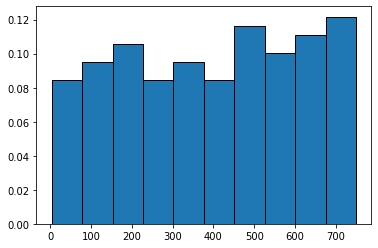

In [142]:
NEGdata = df.loc[df['sentimiento'] == 'NEG']

print(df.count())
print(NEGdata.count())
print(NEGdata['Índice'].count())

#create relative frequency histogram
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(NEGdata['Índice'], edgecolor='black', weights=np.ones_like(NEGdata['Índice']) / NEGdata['Índice'].count())

array([<AxesSubplot:title={'center':'NEG'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'NEU'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'POS'}, ylabel='Frequency'>],
      dtype=object)

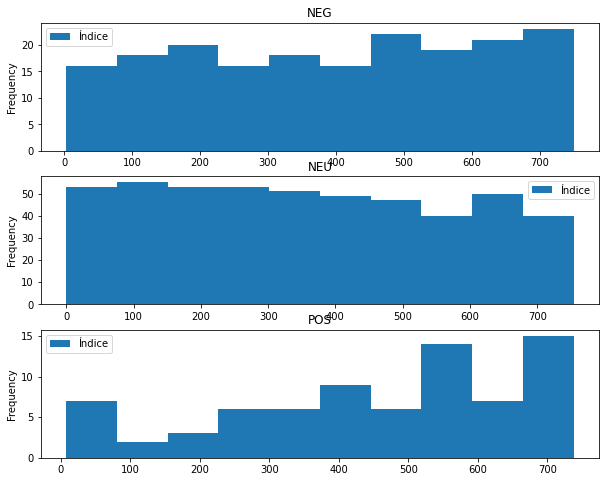

In [144]:
df.plot.hist(column=["Índice"], by="sentimiento", figsize=(10, 8))